## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Loading data set

In [2]:
data = pd.read_json('../data/italianـcoffeeـshop.json')

## looking at data

### 1.first glance

In [3]:
data.head()


,year,province,Espresso,Cappuccino,Latte,Macchiato,Lungo
0,2016,Caltanissetta,270.0,1590.0,490.0,40.0,50.0
1,2011,Bergamo,470.0,7430.0,1190.0,150.0,50.0
2,2016,Imperia,730.0,5350.0,1050.0,180.0,70.0
3,2007,Milan,660.0,10560.0,1430.0,280.0,100.0
4,2013,Pavia,710.0,8660.0,1320.0,180.0,130.0


### 2. check for duplicate rows
#### (there is no duplicated row)

In [4]:
np.sum(data.duplicated())

0

### 3. check for missing values

In [5]:
np.sum(data.isnull())

year           0
province       0
Espresso      32
Cappuccino    32
Latte         32
Macchiato     32
Lungo         32
dtype: int64

#### 3.1 looking at rows that has Nan value

In [6]:
data[data["Espresso"].isnull()].head()

,year,province,Espresso,Cappuccino,Latte,Macchiato,Lungo
36,2016,Crotone,NaN,NaN,NaN,NaN,NaN
91,2014,Novara,NaN,NaN,NaN,NaN,NaN
151,2010,Crotone,NaN,NaN,NaN,NaN,NaN
152,2005,Crotone,NaN,NaN,NaN,NaN,NaN
171,2011,Novara,NaN,NaN,NaN,NaN,NaN


#### 3.2 removing all rows that all the features is Nan

In [7]:
caffee_cols = data.columns[2:]
rows_with_all_nan_index = [index for index, row in data[caffee_cols].iterrows() if row.isnull().all()]
data = data.drop(rows_with_all_nan_index)

#### 3.3 checking for Nan values again

In [8]:
np.sum(data.isnull())

year          0
province      0
Espresso      0
Cappuccino    0
Latte         0
Macchiato     0
Lungo         0
dtype: int64

#### there is no rows that some of values is Nan so we cant impute values based on values of other features
(imputation doesnt add any new information)

### 4. EDA

#### 4.1 univariant analysis

##### 4.1.1 Categorical Unordered Univariate Analysis

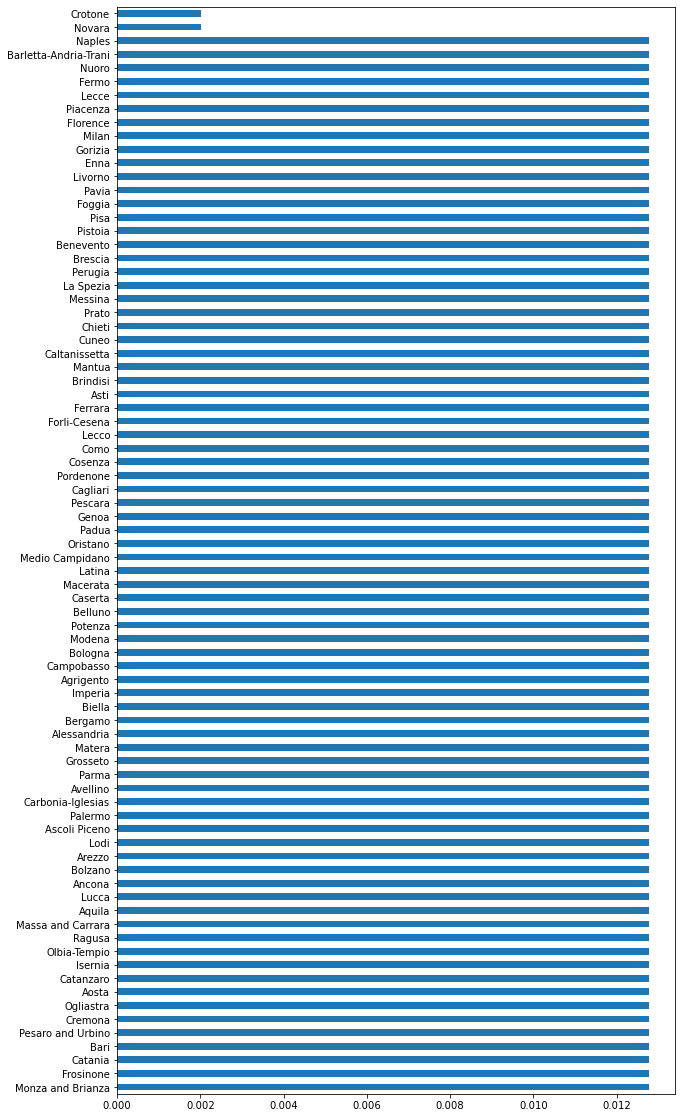

In [14]:
plt.rcParams["figure.figsize"] = (10,20)
data.province.value_counts(normalize=True).plot.barh()
plt.show()

##### all the rows that contain Nan was in crotone and Noyara province

##### 4.1.2 Categorical ordered Univariate Analysis

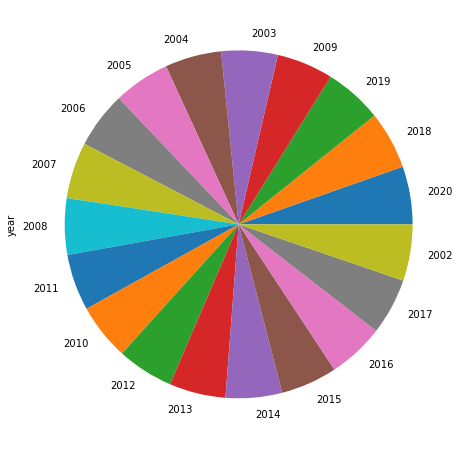

In [15]:
plt.rcParams["figure.figsize"] = (8,8)
data.year.value_counts(normalize=True).plot.pie()
plt.show()

In [16]:
data.year.value_counts(normalize=False)

2020    80
2018    80
2019    80
2009    78
2003    78
2004    78
2005    78
2006    78
2007    78
2008    78
2011    78
2010    78
2012    78
2013    78
2014    78
2015    78
2016    78
2017    78
2002    78
Name: year, dtype: int64

##### we removed 32 rows from crotone and noyara province and it was for [2002-2018]. but our data is equaly distributed among years


##### 4.1.3 quantitative ordered Univariate Analysis

In [17]:
data.Espresso.describe(),data.Cappuccino.describe(),data.Latte.describe(),data.Macchiato.describe(),data.Lungo.describe()

(count    1488.000000
 mean      566.282258
 std       283.834257
 min        10.000000
 25%       350.000000
 50%       540.000000
 75%       741.000000
 max      1810.000000
 Name: Espresso, dtype: float64,
 count     1488.000000
 mean      5117.157930
 std       2508.517486
 min        100.000000
 25%       3250.000000
 50%       4950.000000
 75%       6680.000000
 max      20730.000000
 Name: Cappuccino, dtype: float64,
 count    1488.000000
 mean     1179.708333
 std       512.177849
 min        40.000000
 25%       827.500000
 50%      1150.000000
 75%      1500.000000
 max      4060.000000
 Name: Latte, dtype: float64,
 count    1488.000000
 mean      131.391801
 std        79.774087
 min        10.000000
 25%        80.000000
 50%       120.000000
 75%       170.000000
 max       556.000000
 Name: Macchiato, dtype: float64,
 count    1488.000000
 mean       52.622984
 std        40.398648
 min         0.000000
 25%        20.000000
 50%        40.000000
 75%        70.000000
 m

##### it seams that people in italy realy love  Cappuccino or there is some outlier that effect this mean value
##### so lets plot values of each column

In [18]:
data["index"] = data.index
cafee_with_index_cols = list(caffee_cols) + ['index']


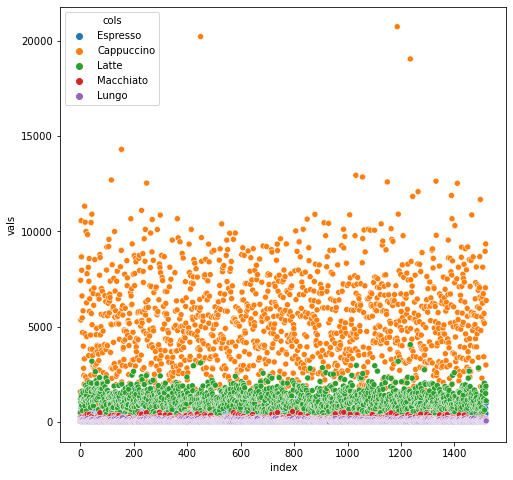

In [19]:
dfm = data[cafee_with_index_cols].melt('index', var_name='cols', value_name='vals')
g = sns.scatterplot(x="index", y="vals", hue='cols', data=dfm)

##### it seams tthat people love cappuchino in italy and its not based on some sample noise

#### 4.2 Bivariate Analysis

##### 4.2.1 numeric-numeric analysis

In [20]:
print(caffee_cols)

Index(['Espresso', 'Cappuccino', 'Latte', 'Macchiato', 'Lungo'], dtype='object')


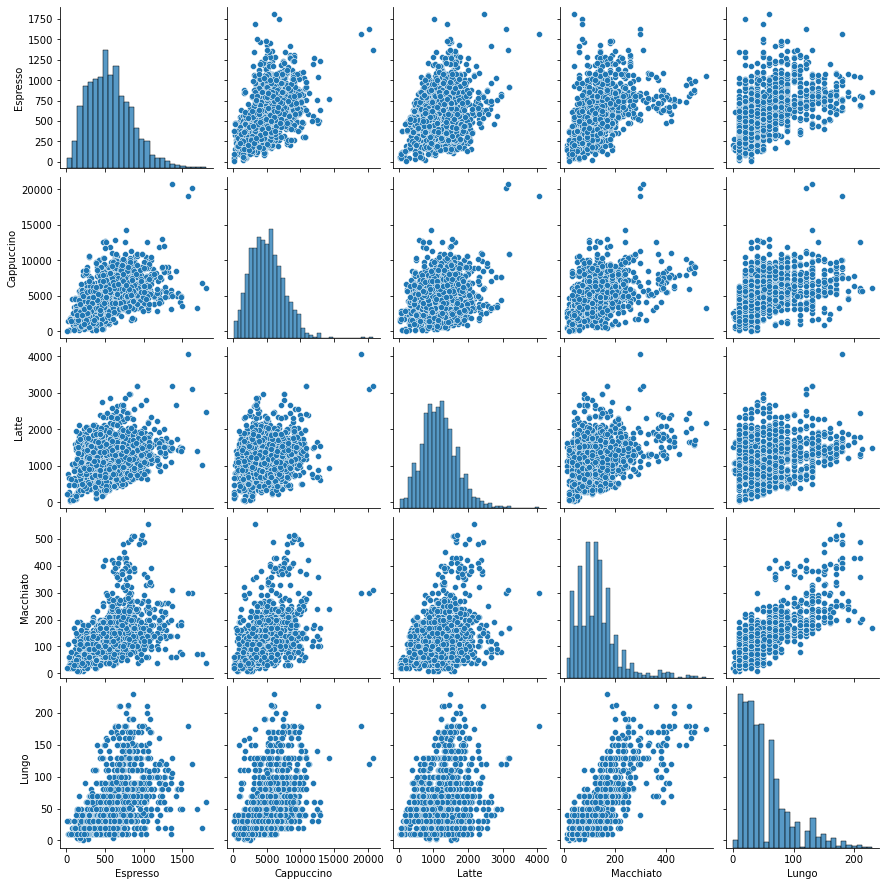

In [21]:
sns.pairplot(data = data, vars=caffee_cols)
plt.show()

##### it seams that caffee consumption of all kind of cafee is related to other (the pair plot seams to act as line)
##### for better underrstanding this relation lets plot the correlation matrix

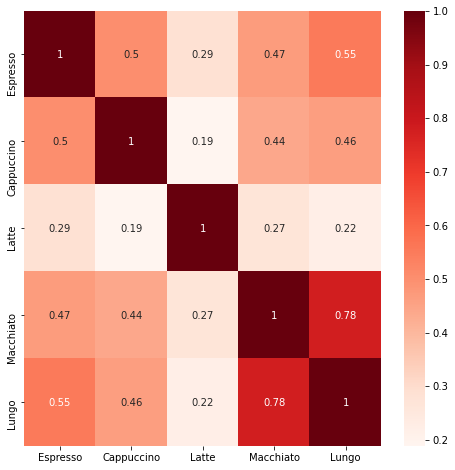

In [22]:
sns.heatmap(data[caffee_cols].corr(), annot=True, cmap = 'Reds')
plt.show()

##### from this matrix we can inference that consumption of macchiato is so corelated with Lungo
##### and consumption of all the coffees is corelated to each other
##### but the Late consumption is less corelated to other types of caffees
##### (consider that its only linear corelation and its possible that there is some non-linear corelation between theme)

###
#### (from this cor matrix we will understand that our problem is multivariate problem
#### and cant see feature as independent feature to another)
###

### split the data set based on province

In [24]:
dfs_by_province = {
   accepted: sub_df.sort_values('year')
   for accepted, sub_df in data.groupby("province")
}

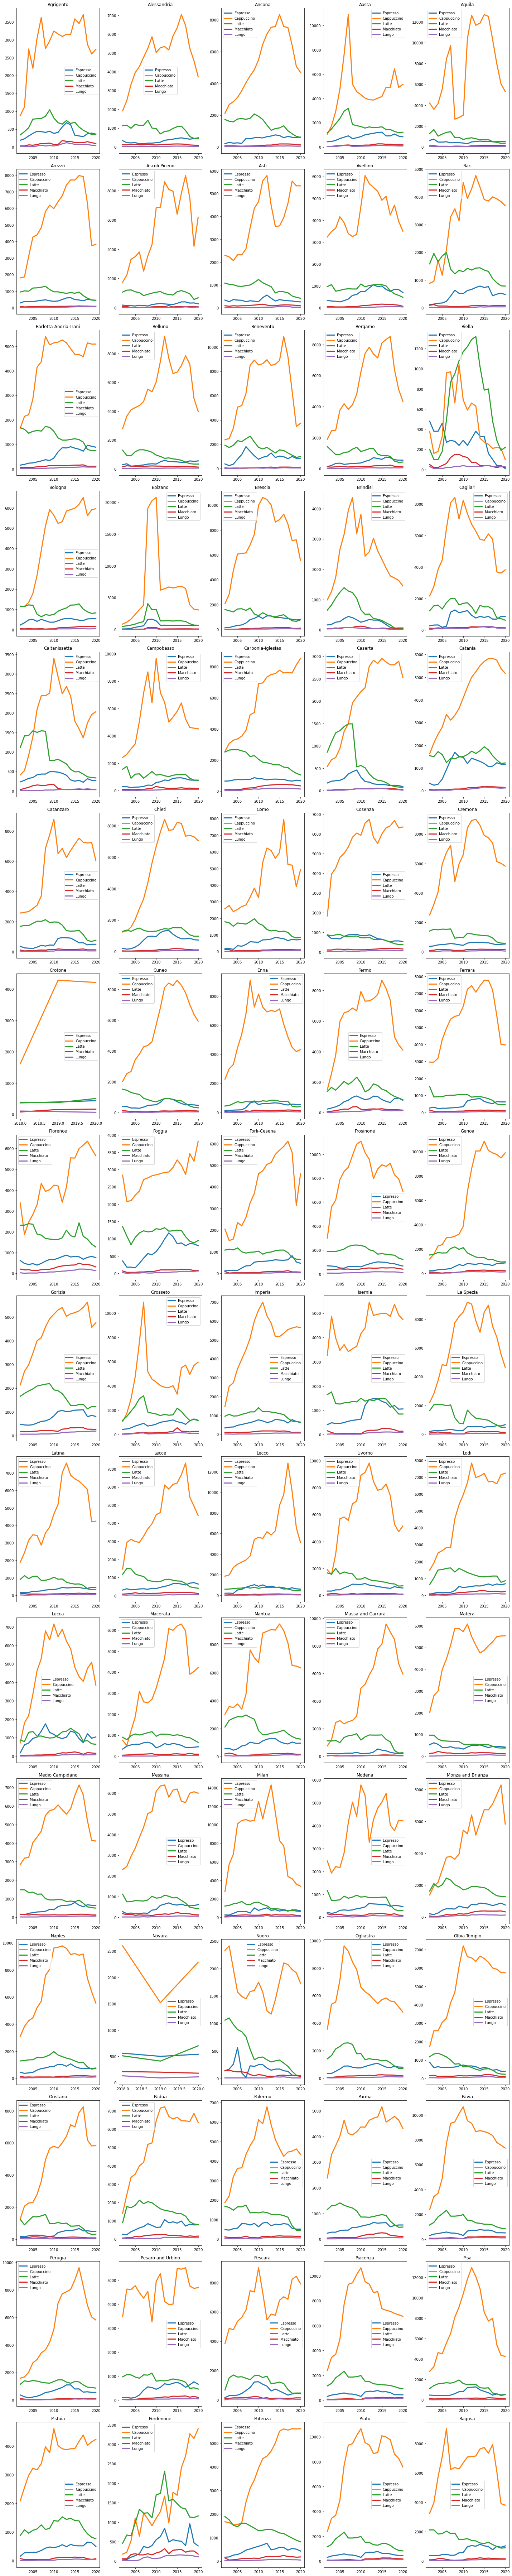

In [25]:
plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(16, 5)
fig.set_figheight(100)
fig.set_figwidth(20)
i =-1
j =0
for key, value in dfs_by_province.items():
    
    if j%5 ==0:
        j =0
        i+=1
    axs[i, j].plot(dfs_by_province[key].year, dfs_by_province[key].Espresso, linewidth=3,label='Espresso')
    axs[i, j].plot(dfs_by_province[key].year, dfs_by_province[key].Cappuccino, linewidth=3,label = "Cappuccino")
    axs[i, j].plot(dfs_by_province[key].year, dfs_by_province[key].Latte, linewidth=3,label = "Latte")
    axs[i, j].plot(dfs_by_province[key].year, dfs_by_province[key].Macchiato, linewidth=3,label = "Macchiato" )
    axs[i, j].plot(dfs_by_province[key].year, dfs_by_province[key].Lungo, linewidth=3,label = "Lungo")
    axs[i, j].set_title(key)
    axs[i,j].legend()
    j+=1
fig.tight_layout()

<AxesSubplot:ylabel='province'>

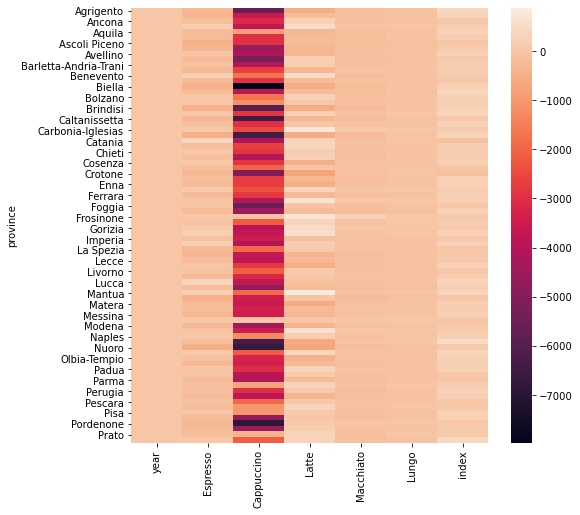

In [26]:
test_df = data.groupby('province').mean() - data[data.province == "Milan"].mean()
sns.heatmap(test_df)

##### Cappuchino consuption in milan is so diffrent to another region is italy

### 5. Normalization

as you can see in above plots each caffee consumption is difrence in concept of scale. for example Cappuchino is most favorit Caffee in almost all the regions. if we compare each plot in each province with each other it will cause some problem. the problem is the comparison dont look at features (ex. Late vs Cappuchino) in similar manner.to solve this problem we should use Normalization. we can normalize each feature that its means be zero and its std become 1. if we do this the min and max of each feature in each province doesnt remove and the the min and max of feature effect the comparision. if we are searching for similar province in aspect of shape of data, we can rescale the data between zero and one.
so in norm1 we will use Z value of each feature for normalization and for norm2 (if we are just intrested in patterns) we use min-max normalization and we conduct our analysis in these two ways.

#### Before Normalization:

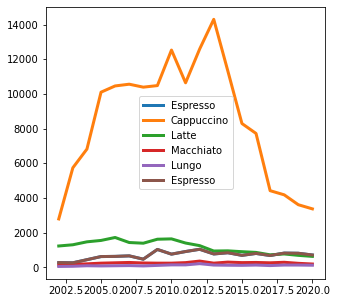

In [28]:
key = "Milan"
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(dfs_by_province[key].year, dfs_by_province[key].Espresso, linewidth=3,label='Espresso')
plt.plot(dfs_by_province[key].year, dfs_by_province[key].Cappuccino, linewidth=3,label = "Cappuccino")
plt.plot(dfs_by_province[key].year, dfs_by_province[key].Latte, linewidth=3,label = "Latte")
plt.plot(dfs_by_province[key].year, dfs_by_province[key].Macchiato, linewidth=3,label = "Macchiato" )
plt.plot(dfs_by_province[key].year, dfs_by_province[key].Lungo, linewidth=3,label = "Lungo")
plt.plot(dfs_by_province[key].year, dfs_by_province[key].Espresso, linewidth=3,label='Espresso')
plt.legend()

#### Z normalization

In [29]:
dfs_by_province_norm1 = {}
for province,df in dfs_by_province.items():
    static = df[["year","province"]]
    features = df[caffee_cols]
    features_norm1 = (features-features.mean())/features.std()
    df_norm = pd.concat([static, features_norm1], axis=1)
    dfs_by_province_norm1[province] = df_norm

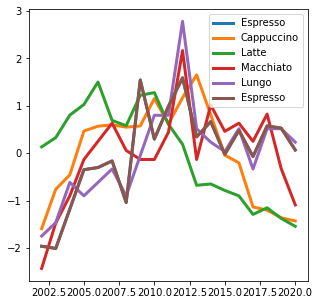

In [30]:
key = "Milan"
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(dfs_by_province_norm1[key].year, dfs_by_province_norm1[key].Espresso, linewidth=3,label='Espresso')
plt.plot(dfs_by_province_norm1[key].year, dfs_by_province_norm1[key].Cappuccino, linewidth=3,label = "Cappuccino")
plt.plot(dfs_by_province_norm1[key].year, dfs_by_province_norm1[key].Latte, linewidth=3,label = "Latte")
plt.plot(dfs_by_province_norm1[key].year, dfs_by_province_norm1[key].Macchiato, linewidth=3,label = "Macchiato" )
plt.plot(dfs_by_province_norm1[key].year, dfs_by_province_norm1[key].Lungo, linewidth=3,label = "Lungo")
plt.plot(dfs_by_province_norm1[key].year, dfs_by_province_norm1[key].Espresso, linewidth=3,label='Espresso')
plt.legend()

#### min-max normalization

In [31]:
dfs_by_province_norm2 = {}
for province,df in dfs_by_province.items():
    static = df[["year","province"]]
    features = df[caffee_cols]
    features_norm2 = (features - features.min()) / (features.max() - features.min())
    df_norm = pd.concat([static, features_norm2], axis=1)
    dfs_by_province_norm2[province] = df_norm

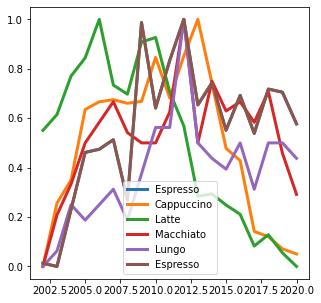

In [32]:
key = "Milan"
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(dfs_by_province_norm2[key].year, dfs_by_province_norm2[key].Espresso, linewidth=3,label='Espresso')
plt.plot(dfs_by_province_norm2[key].year, dfs_by_province_norm2[key].Cappuccino, linewidth=3,label = "Cappuccino")
plt.plot(dfs_by_province_norm2[key].year, dfs_by_province_norm2[key].Latte, linewidth=3,label = "Latte")
plt.plot(dfs_by_province_norm2[key].year, dfs_by_province_norm2[key].Macchiato, linewidth=3,label = "Macchiato" )
plt.plot(dfs_by_province_norm2[key].year, dfs_by_province_norm2[key].Lungo, linewidth=3,label = "Lungo")
plt.plot(dfs_by_province_norm2[key].year, dfs_by_province_norm2[key].Espresso, linewidth=3,label='Espresso')
plt.legend()

### 6. DTW (dynamic time wraping similarity)
DTW is similarity measure for two univariant time series data it will find points in both time series that related to others and find the cost of converting one time serries to another.
for comparing two province we find DTW for each feature and then sum up these values to show the similarity of two province. for example if we want to compare milan with Enna we find DTW for Espresso,Latte,... between thees provine and then using sum we will find the similarity measure between milan and Enna.

#### this function calculate distance matrix based on similarity measure that explained:

In [33]:
def distance_matrix_calculator(index_province,dfs_by_province):
    n = len(index_province.keys())
    dist_matrix = np.zeros((n,n))
    for i,prov1 in index_province.items():
        for j,prov2 in index_province.items():
            d = 0
            for l in dfs_by_province["Milan"].columns[2:]:
                a = np.array(dfs_by_province[prov1][["Cappuccino"]])
                b = np.array(dfs_by_province[prov2]["Cappuccino"])
                d += dtw(a, b).distance
            dist_matrix[i,j] = d
    return dist_matrix

### create distance matrix using DTW and norm1 data:

In [35]:
index_province = dict(zip(range(len(dfs_by_province_norm1.keys())), dfs_by_province_norm1.keys()))
for i,prov in index_province.items():
    if prov == "Milan":
        milan_index = i
distance_matrix = distance_matrix_calculator(index_province,dfs_by_province_norm1)
print("10 city that has similar behavior with milan:")
for indx in np.argsort(distance_matrix[milan_index])[1:11]:
    print(index_province[indx]) 

10 city that has similar behavior with milan:
Benevento
Medio Campidano
Ferrara
Cagliari
La Spezia
Pisa
Enna
Naples
Brindisi
Ogliastra


### looking of Bevento and milan plots (norm1):

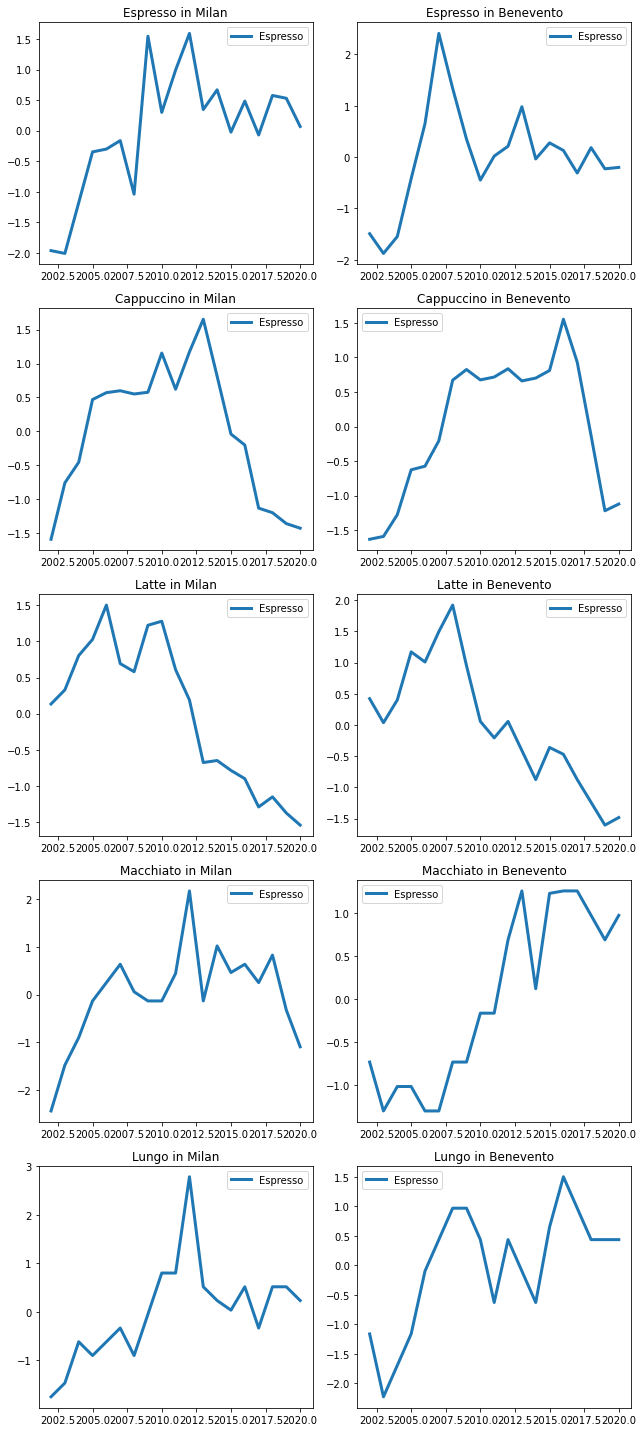

In [37]:
plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(5, 2)
fig.set_figheight(20)
fig.set_figwidth(9)
key1 = "Milan"
key2 = "Benevento"
for i, value in enumerate(caffee_cols):
    axs[i, 0].plot(dfs_by_province_norm1[key1].year, dfs_by_province_norm1[key1][value], linewidth=3,label='Espresso')
    axs[i, 0].set_title(value+" in "+ key1)
    axs[i,0].legend()
    
    axs[i, 1].plot(dfs_by_province_norm1[key2].year, dfs_by_province_norm1[key2][value], linewidth=3,label='Espresso')
    axs[i, 1].set_title(value+" in "+ key2)
    axs[i,1].legend()
fig.tight_layout()

### create distance matrix using DTW and norm2 data:

In [38]:
index_province = dict(zip(range(len(dfs_by_province_norm2.keys())), dfs_by_province_norm2.keys()))
for i,prov in index_province.items():
    if prov == "Milan":
        milan_index = i
distance_matrix = distance_matrix_calculator(index_province,dfs_by_province_norm2)
print("10 city that has similar behavior with milan:")
for indx in np.argsort(distance_matrix[milan_index])[1:11]:
    print(index_province[indx]) 

10 city that has similar behavior with milan:
Benevento
Pisa
Brindisi
Ragusa
Ferrara
Bergamo
Medio Campidano
Lecco
Fermo
Arezzo


### looking of pisa and milan plots (norm2):

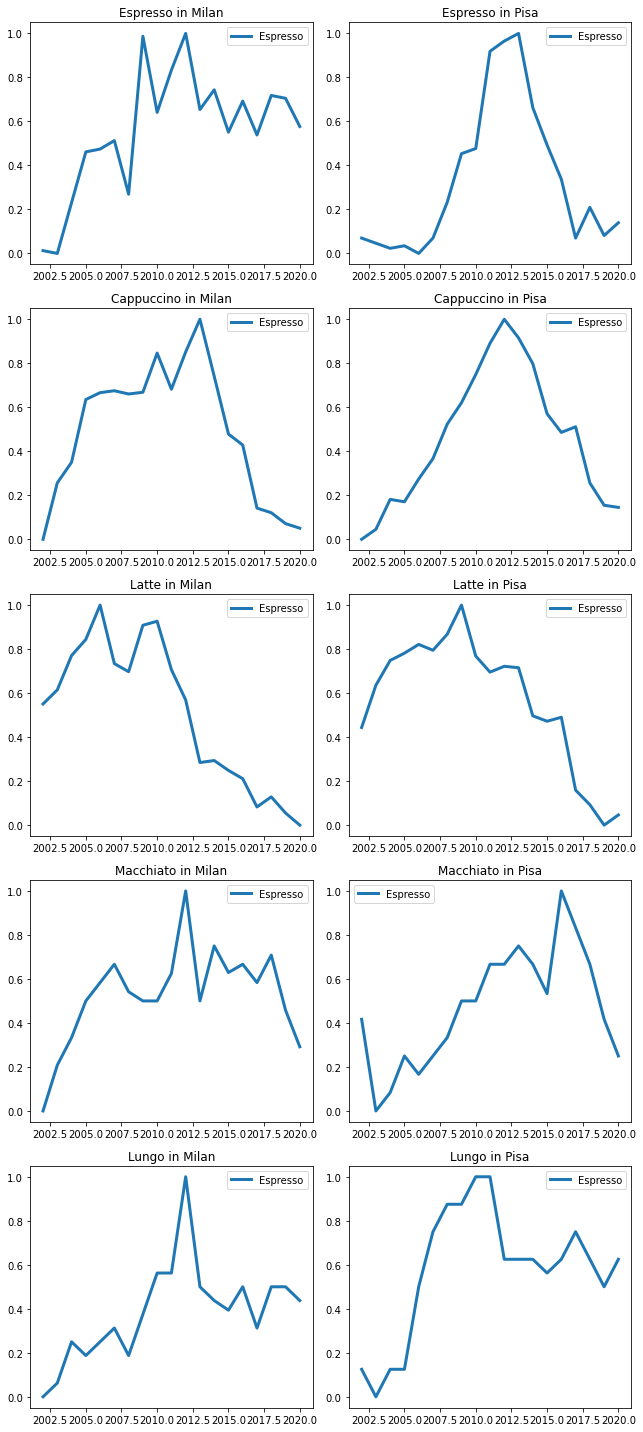

In [39]:
plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(5, 2)
fig.set_figheight(20)
fig.set_figwidth(9)
key1 = "Milan"
key2 = "Pisa"
for i, value in enumerate(caffee_cols):
    axs[i, 0].plot(dfs_by_province_norm2[key1].year, dfs_by_province_norm2[key1][value], linewidth=3,label='Espresso')
    axs[i, 0].set_title(value+" in "+ key1)
    axs[i,0].legend()
    
    axs[i, 1].plot(dfs_by_province_norm2[key2].year, dfs_by_province_norm2[key2][value], linewidth=3,label='Espresso')
    axs[i, 1].set_title(value+" in "+ key2)
    axs[i,1].legend()
fig.tight_layout()

### you can see the network of similarity from the result of this code:
(changing the treshold for better understanding)
(it will take a little time so ty for being patient)

In [40]:
distance_matrix_normalised = distance_matrix/np.max(np.abs(distance_matrix),axis=0)
similarity_matrix_norm = 1 - distance_matrix_normalised
import pickle
with open('../data/index_province.pickle', 'wb') as handle:
    pickle.dump(index_province,handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/similarity.pickle', 'wb') as handle:
    pickle.dump(similarity_matrix_norm, handle, protocol=pickle.HIGHEST_PROTOCOL)
!python ploter.py

0
1
2
3
4
5
6
7
8
0.4
0.45
0.5
0.55
0.6
0.6499999999999999
0.7
0.75
0.7999999999999999
here
